In [1]:
import statistics
import numpy as np
import math

class Building:
    dist=28
    data={
        'Big':{
            'Height':[50,10],
            'Width':[30,5],
            'Depth':[25,4]
        },
        'Mean':{
            'Height':[30,8],
            'Width':[20,4],
            'Depth':[15,3]
        },
        'Small':{
            'Height':[15,5],
            'Width':[10,2],
            'Depth':[8,2]
        }
    }
    def __init__(self, street, city, street_size='Mean'):
        street_dir = (2, 3)
        street_point = (200, 400)
        height = random.gauss(self.data[street_size]['Height'][0],self.data[street_size]['Height'][1])
        width = random.gauss(self.data[street_size]['Width'][0],self.data[street_size]['Width'][1])
        depth = random.gauss(self.data[street_size]['Depth'][0],self.data[street_size]['Depth'][1])
        self.size = [height,width,depth]
        
        self.direction = (street_dir[1], -street_dir[0])
        self.center_location = (street_point[0] + street_dir[0] * (self.dist + self.size[2] / 2), street_point[1] + street_dir[1] * (self.dist + self.size[2] / 2))
        
    
    


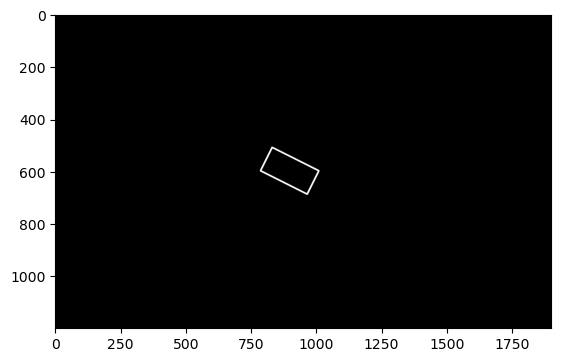

In [2]:
import numpy as np
import matplotlib.pyplot as plt

SCREEN_WIDTH = 1900
SCREEN_HEIGHT = 1200

# Function to draw a point
def draw_point(screen, x, y, width, color=1):
    for i in range(-width // 2, width // 2):
        for j in range(-width // 2, width // 2):
            if 0 <= x + i < SCREEN_WIDTH and 0 <= y + j < SCREEN_HEIGHT:
                screen[y + j][x + i] = color
    return screen

# Function to draw a line between two points
def draw_line(screen, p1, p2, width, color=3):
    a = (p1[1] - p2[1]) / (p1[0] - p2[0])
    b = p1[1] - a * p1[0]
    for x in np.linspace(p1[0], p2[0], 500):
        y = a * x + b
        screen = draw_point(screen, int(x), int(y), width, color)
    return screen

# Function to draw a rectangle
def draw_rectangle(screen, center, direction, height, width, line_width=2, color=2):
    # Normalize the direction vector
    direction = direction / np.linalg.norm(direction)

    # Find perpendicular vector for the width
    perpendicular = np.array([-direction[1], direction[0]])

    # Calculate the four corners of the rectangle
    half_height_vec = (direction * (height / 2))
    half_width_vec = (perpendicular * (width / 2))

    # Calculate the rectangle's corners based on the center
    p1 = center + half_height_vec + half_width_vec
    p2 = center + half_height_vec - half_width_vec
    p3 = center - half_height_vec - half_width_vec
    p4 = center - half_height_vec + half_width_vec

    # Draw the lines between the corners
    screen = draw_line(screen, p1, p2, line_width, color)
    screen = draw_line(screen, p2, p3, line_width, color)
    screen = draw_line(screen, p3, p4, line_width, color)
    screen = draw_line(screen, p4, p1, line_width, color)

    return screen

# Example usage:
# Create an empty screen
screen = np.zeros((SCREEN_HEIGHT, SCREEN_WIDTH), dtype=int)

# Parameters for the rectangle
center = np.array([900, 600])  # center point (x, y)
direction = np.array([1, 0.5])  # direction vector (x, y)
height = 200  # height of the rectangle
width = 100   # width of the rectangle

# Draw the rectangle
screen = draw_rectangle(screen, center, direction, height, width, line_width=5, color=2)

# Display the screen using matplotlib
def display_screen(screen):
    plt.imshow(screen, cmap='gray')
    plt.show()

display_screen(screen)


In [ ]:
import bpy
import random
import math

class Building:
    dist = 5  # Distance between buildings
    road_width = 20  # Width of the road
    sidewalk = 5  # Width of the sidewalk
    data = {
        'Big': {
            'Height': [50, 10],
            'Width': [30, 5],
            'Depth': [25, 4]
        },
        'Mean': {
            'Height': [30, 8],
            'Width': [20, 4],
            'Depth': [15, 3]
        },
        'Small': {
            'Height': [15, 5],
            'Width': [10, 2],
            'Depth': [8, 2]
        }
    }

    def __init__(self, street_size='Mean'):
        height = random.gauss(self.data[street_size]['Height'][0], self.data[street_size]['Height'][1])
        width = random.gauss(self.data[street_size]['Width'][0], self.data[street_size]['Width'][1])
        depth = random.gauss(self.data[street_size]['Depth'][0], self.data[street_size]['Depth'][1])
        self.size = [height, width, depth]
        self.center_location = (0, 0)  # Will be set later

def create_building(building):
    bpy.ops.mesh.primitive_cube_add(size=1)
    obj = bpy.context.active_object
    
    # Set scale
    obj.scale = (building.size[1], building.size[2], building.size[0])
    
    # Set location
    obj.location = (building.center_location[0], building.center_location[1], building.size[0] / 2)

def create_street(length, width):
    bpy.ops.mesh.primitive_plane_add(size=1)
    street = bpy.context.active_object
    street.scale = (length, width, 1)
    street.location = (0, 0, 0.1)  # Slightly above ground to avoid z-fighting
    
    # Add a material to the street
    mat = bpy.data.materials.new(name="Street_Material")
    mat.use_nodes = True
    mat.node_tree.nodes["Principled BSDF"].inputs[0].default_value = (0.1, 0.1, 0.1, 1)  # Dark gray
    street.data.materials.append(mat)

# Clear existing objects
bpy.ops.object.select_all(action='SELECT')
bpy.ops.object.delete()

# Set unit scale to meters
bpy.context.scene.unit_settings.scale_length = 1
bpy.context.scene.unit_settings.length_unit = 'METERS'

# Create street
street_length = 300
street_width = Building.road_width
create_street(street_length, street_width)

# Create buildings
street_sizes = ['Small', 'Mean', 'Big']
buildings = []
building_count = 20  # Number of buildings to create

for i in range(building_count):
    street_size = random.choice(street_sizes)
    new_building = Building(street_size)
    
    # Determine which side of the street to place the building
    side = 1 if i % 2 == 0 else -1
    
    # Calculate building position
    x_pos = (i // 2) * (max(new_building.size[1], new_building.size[2]) + Building.dist) - street_length / 2
    y_pos = side * (street_width / 2 + Building.sidewalk + new_building.size[2] / 2)
    
    new_building.center_location = (x_pos, y_pos)
    buildings.append(new_building)
    create_building(new_building)

# Add a ground plane
ground_size = max(street_length * 1.2, street_width * 4)
bpy.ops.mesh.primitive_plane_add(size=ground_size, location=(0, 0, 0))

# Add a sun light
bpy.ops.object.light_add(type='SUN', location=(0, 0, 100))

# Set up the camera
cam_distance = street_length * 0.8
bpy.ops.object.camera_add(location=(cam_distance, -cam_distance/2, cam_distance/2), 
                          rotation=(math.radians(60), 0, math.radians(45)))
bpy.context.scene.camera = bpy.context.object

# Set the 3D viewport to look through the camera
for area in bpy.context.screen.areas:
    if area.type == 'VIEW_3D':
        area.spaces[0].region_3d.view_perspective = 'CAMERA'
        break

# Select all objects and adjust view
bpy.ops.object.select_all(action='SELECT')
bpy.ops.view3d.view_selected(use_all_regions=False)